#### important function use in this lab

In [1]:
# Use in GCD1 and GCD2
from collections import Counter

def resultGCD(m, n):
    """
    Args:
    ----
        m: list of prime factors
        n: list of prime factors
    
    Return:
    ----
        common_factors: representing the GCD of m and n
        steps: representing the number of steps taken to find the GCD
    
    Time Complexity:
    ----
        O(m + n)
    """
    m_counts = Counter(m) #O(m)
    n_counts = Counter(n) #O(n)
    
    common_factors = 1
    steps = len(m)+len(n)+3
    
    for prime, count in m_counts.items(): #O(m)
        steps+=1
        if prime in n_counts: #O(1) because n_counts is a dictionary so lookup is O(1)
            steps+=1
            # Take the minimum count for this prime in both m and n
            min_count = min(count, n_counts[prime])
            steps+=2
            # Multiply common_factors by prime raised to the min_count
            common_factors *= (prime ** min_count)
            steps+=2

    return common_factors, steps


FindGCD1(m,n)

Step 1 Find the prime factorization of m

Step 2 Find the prime factorization of n

Step 3 Find all the common prime factors

Step 4 Compute the product of all the common prime factors and return it as gcd(m,n)

Where the prime factorization technique is implemented by a Naive solution.

In [2]:
def prime_factor(n):
    """
    compute the prime factors of n

    Args:
    ----
      n: number to be factored

    Returns:
    ----
      a list of prime factors of n
      
    Time Complexity:
    ----
      O(sqrt(n)*log(n))
    """
    steps = 0
    factors = []
    steps += 1
    
    # skip all even numbers
    while n % 2 == 0:  # O(log(n))
        factors.append(2)
        n //= 2
        steps += 3

    for i in range(3, int(n**0.5) + 1, 2):  # O(sqrt(n))
        while n % i == 0:  # O(log(n))
            factors.append(i)
            n //= i
            steps += 3
        steps += 1
    if n>2:
      factors.append(n)
      steps += 2
    return factors , steps

def FindGCD1(*nums):
    """
    compute the greatest common divisor of m and n using Naive method

    Args:
    ----
      nums: a list of integers    

    Returns:
    ----
      the greatest common divisor of list of integers
    
    Time Complexity:
    ----
      O(n*sqrt(n)*log(n))
    """
    if len(nums) == 0 or len(nums) == 1:
        return -1,1
    if all(num == 0 for num in nums):
        return 0,len(nums)+1 # +1 for the condition check

    steps = 0
    # If any of the numbers is zero, ignore it
    nums = [num for num in nums if num != 0]
    steps+=len(nums)
    nums = [abs(num) for num in nums]  # Make sure all numbers are positive
    steps+=len(nums)
    gcd_result = nums[0]
    steps+=1
    
    for num in nums[1:]: # O(n)
      prime_factor_gcd,step1 = prime_factor(gcd_result)
      prime_factor_num,step2 = prime_factor(num) 
      gcd_result,step3 = resultGCD(prime_factor_gcd, prime_factor_num) 
      steps += step1+step2+step3+4
    return gcd_result,steps


# GCD1 test

In [3]:
import math
# Test cases
test_cases = [
    #Case1
    (111, 234),
    (60, 225),
    (42, 584010),
    (11, 13),
    (7854, 4746),
    (89406024,277984),
    (742271756, 606228865),
    #Extra case1
    (36, 84, 120),
    (189, 252, 1197, 292005),
    #Plot case1
    (30, 15),
    (20, 72),
    (72, 88),
    (58, 77),
    (92, 80),
    (286, 544),
    (985, 716),
    (839, 433),
    (471, 561),
    (269, 749),
    (1888, 1224),
    (3164, 6996),
    (6253, 5431),
    (4390, 2874),
    (5017, 7615),
    (76241, 57606),
    (74766, 64553),
    (12322, 50440),
    (34726, 92155),
    (14785, 19817),
    (672270, 431511),
    (694404, 256785),
    (975922, 532283),
    (279392, 946230),
    (906443, 392685),
    (2226412, 8648878),
    (6061228, 5546440),
    (1691980, 1414558),
    (3234496, 7268362),
    (8356954, 3705742),
    (81786288, 61052652),
    (21535993, 91675657),
    (26586591, 78851391),
    (68575643, 45017255),
    (45991767, 77583796),
    (459917672, 775837965),
    (265865917, 788513914),
    (685756433, 450172557),
    (785756437, 102475659),
    (504857673, 354879547),
    (4737418245, 9465215337),
    (7384184877, 6565315335),
    (6531741823, 8795491761),
    (5865583711, 9535851393),
    (6954464645, 8017257569),
    (84184418245, 65310172575),
    (58659151391, 85756451391),
    (57564301725, 74851857673),
    (59917672487, 88512663377),
    (65315344641, 98418485851),
    (789176724879, 659151396733),
    (659117416437, 946585181391),
    (653184188245, 758331017965),
    (841818235337, 767318488245),
    (953525754641, 658518571823),
    #other case
    (0, 234),       # One element as zero
    (111, 0),       # Other element as zero
    (0, 0),         # Both elements as zero
    (0, 0, 0),        # All elements as zero
    (1, 234),       # One element as one
    (7854, 1),      # Other element as one
    (1, 1),          # Both elements as one
    (15485863,30971726),
    (111,234),
]

# Variables to track test results
total_tests = len(test_cases)
failed_tests = []

# Run the test cases and compare with math.gcd
for test in test_cases:
    result,steps = FindGCD1(*test)
    expected = math.gcd(*test)
    if result != expected:
        failed_tests.append((test, result, expected))

# Report results
if not failed_tests:
    print("ALL tests passed! ✅")
else:
    print(f"{total_tests - len(failed_tests)} out of {total_tests} tests passed.")
    print("Failed tests:")
    for test, res, exp in failed_tests:
        print(f"For {test}, got: {res} (Expected: {exp})")


ALL tests passed! ✅


# GCD1 graph

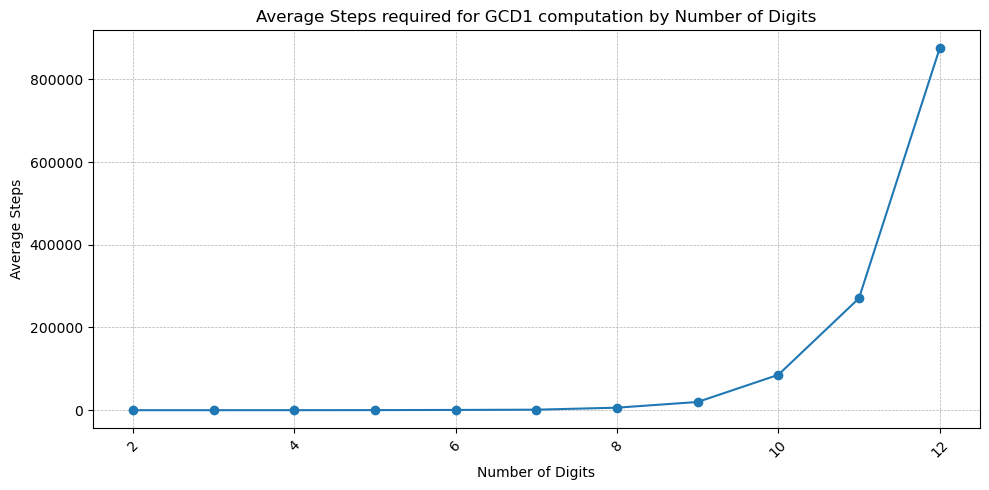

In [4]:
import matplotlib.pyplot as plt

# Sample test data in pairs only
test_cases = [
    (30, 15),
    (20, 72),
    (72, 88),
    (58, 77),
    (92, 80),
    (286, 544),
    (985, 716),
    (839, 433),
    (471, 561),
    (269, 749),
    (1888, 1224),
    (3164, 6996),
    (6253, 5431),
    (4390, 2874),
    (5017, 7615),
    (76241, 57606),
    (74766, 64553),
    (12322, 50440),
    (34726, 92155),
    (14785, 19817),
    (672270, 431511),
    (694404, 256785),
    (975922, 532283),
    (279392, 946230),
    (906443, 392685),
    (2226412, 8648878),
    (6061228, 5546440),
    (1691980, 1414558),
    (3234496, 7268362),
    (8356954, 3705742),
    (81786288, 61052652),
    (21535993, 91675657),
    (26586591, 78851391),
    (68575643, 45017255),
    (45991767, 77583796),
    (459917672, 775837965),
    (265865917, 788513914),
    (685756433, 450172557),
    (785756437, 102475659),
    (504857673, 354879547),
    (4737418245, 9465215337),
    (7384184877, 6565315335),
    (6531741823, 8795491761),
    (5865583711, 9535851393),
    (6954464645, 8017257569),
    (84184418245, 65310172575),
    (58659151391, 85756451391),
    (57564301725, 74851857673),
    (59917672487, 88512663377),
    (65315344641, 98418485851),
    (789176724879, 659151396733),
    (659117416437, 946585181391),
    (653184188245, 758331017965),
    (841818235337, 767318488245),
    (953525754641, 658518571823)
]

# List to store steps for each test case
steps_for_test_cases = []

# Calculating steps for each test case using FindGCD1
for case in test_cases:
    _, steps = FindGCD1(*case) #unpacking
    steps_for_test_cases.append(steps)

def plot_averaged_data(test_cases, steps_for_test_cases):
    # Group by 5
    grouped_test_cases = [test_cases[i:i+5] for i in range(0, len(test_cases), 5)]
    grouped_steps = [steps_for_test_cases[i:i+5] for i in range(0, len(steps_for_test_cases), 5)]

    # Averaging steps for each group
    average_steps = [sum(group) / len(group) for group in grouped_steps]

    # Number of digits for x-axis label
    x_labels = [len(str(group[0][0])) for group in grouped_test_cases]

    plt.figure(figsize=(10, 5))
    plt.plot(x_labels, average_steps, marker='o', linestyle='-')
    plt.xlabel('Number of Digits')
    plt.ylabel('Average Steps')
    plt.title('Average Steps required for GCD1 computation by Number of Digits')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Call the function
plot_averaged_data(test_cases, steps_for_test_cases)


----

FindGCD2(m,n)

Step 1  Find the prime factorization of m

Step 2  Find the prime factorization of n

Step 3  Find all the common prime factors

Step 4  Compute the product of all the common prime factorsand return it as gcd(m,n)

Where the prime factorizationtechnique is implemented by Sieve of Eratosthenes.

In [5]:
def Sieve_of_Eratosthenes(n):
    """
    compute prime numbers less than n

    Args:
    -----
      n: upper limit of prime numbers

    Returns:
    --------
      prime: contains prime numbers less than n
      steps: number of steps
    
    Time Complexity:
    ----------------
      O(n) + O(nloglogn) + O(sqrt(n))
    """
    is_prime = [True]*(n+1)  # O(n)
    is_prime[0], is_prime[1] = False, False  # O(1)
    prime = []
    steps = (n+1)+1+1+1
    for i in range(2, int(n**0.5)+1): 
        steps += 1
        if is_prime[i]:
            prime.append(i) 
            # we start from i*i because all numbers less than i*i are already marked as False
            for j in range(i*i, n+1, i): # marking off the multiples of i
                is_prime[j] = False
                steps += 4
    # Appending remaining primes
    for i in range(int(math.sqrt(n))+1, n+1):
        steps += 1
        if is_prime[i]:
            prime.append(i)
            steps += 1
    return prime, steps


def prime_factor_Eratosthenes(n, prime):
    """
    compute prime factors of n by dividing n by prime numbers less than sqrt(n)

    Args:
    -----
      n: number to be factored
      prime: list of prime upto n

    Returns:
    --------
      factors: list of prime factors of n
      steps: number of steps
      
    Time Complexity:
    ----------------
      O(sqrt(n) * log(n))
    """
    factors = []
    steps = 1
    if n < 2:
        return factors, steps+1
    for i in range(0, int(n**0.5)):  # O(sqrt(n))
        steps += 1
        while n % prime[i] == 0:  # O(logn)
            factors.append(prime[i])
            n //= prime[i]
            steps += 3

    return factors, steps


def FindGCD2(*nums):
    """
    compute GCD by using Sieve of Eratosthenes

    Args:
    -----
      nums: list of numbers size 2 or more

    Returns:
    --------
      GCD: GCD of list of numbers
      
    Time Complexity:
    ----------------
      O(n^2)
    """
    steps = 0
    if all(num == 0 for num in nums):
        return 0, len(nums)+1
    # If any of the numbers is zero, ignore it
    nums = [num for num in nums if num != 0]
    steps += len(nums)+1
    nums = [abs(num) for num in nums]  # Make sure all numbers are positive
    steps += len(nums)+1

    prime = []
    steps += 1
    prime, step0 = Sieve_of_Eratosthenes(max(nums))
    steps += step0
    gcd_result = nums[0]
    steps += 1
    for num in nums[1:]: #O(n)
        prime_m, step1 = prime_factor_Eratosthenes(gcd_result, prime) # O(sqrt(n) * log(n))
        prime_n, step2 = prime_factor_Eratosthenes(num, prime) # O(sqrt(n) * log(n))
        gcd_result, step3 = resultGCD(prime_m, prime_n) # O(n)
        steps += step1 + step2+ step3 + 1
    return gcd_result, steps


# GCD2 test

In [6]:
import math
# Test cases
test_cases = [
    #Case1
    (111, 234),
    (60, 225),
    (42, 584010),
    (11, 13),
    (7854, 4746),
    # (89406024,277984),
    # (742271756, 606228865),
    #Extra case1
    (36, 84, 120),
    (189, 252, 1197, 292005),
    #Plot case1
    (30, 15),
    (20, 72),
    (72, 88),
    (58, 77),
    (92, 80),
    (286, 544),
    (985, 716),
    (839, 433),
    (471, 561),
    (269, 749),
    (1888, 1224),
    (3164, 6996),
    (6253, 5431),
    (4390, 2874),
    (5017, 7615),
    (76241, 57606),
    (74766, 64553),
    (12322, 50440),
    (34726, 92155),
    (14785, 19817),
    (672270, 431511),
    (694404, 256785),
    (975922, 532283),
    (279392, 946230),
    (906443, 392685),
    (2226412, 8648878),
    (6061228, 5546440),
    (1691980, 1414558),
    (3234496, 7268362),
    (8356954, 3705742),
    # (81786288, 61052652),
    # (21535993, 91675657),
    # (26586591, 78851391),
    # (68575643, 45017255),
    # (45991767, 77583796),
    # (459917672, 775837965),
    # (265865917, 788513914),
    # (685756433, 450172557),
    # (785756437, 102475659),
    # (504857673, 354879547),
    # (4737418245, 9465215337),
    # (7384184877, 6565315335),
    # (6531741823, 8795491761),
    # (5865583711, 9535851393),
    # (6954464645, 8017257569),
    # (84184418245, 65310172575),
    # (58659151391, 85756451391),
    # (57564301725, 74851857673),
    # (59917672487, 88512663377),
    # (65315344641, 98418485851),
    # (789176724879, 659151396733),
    # (659117416437, 946585181391),
    # (653184188245, 758331017965),
    # (841818235337, 767318488245),
    # (953525754641, 658518571823),
    #other case
    (0, 234),       # One element as zero
    (111, 0),       # Other element as zero
    (0, 0),         # Both elements as zero
    (0, 0, 0),        # All elements as zero
    (1, 234),       # One element as one
    (7854, 1),      # Other element as one
    (1, 1),          # Both elements as one
    # (15485863,30971726),
    (111,234),
    (60,225),
]

# Variables to track test results
total_tests = len(test_cases)
failed_tests = []

# Run the test cases and compare with math.gcd
for test in test_cases:
    result,steps = FindGCD2(*test)
    expected = math.gcd(*test)
    if result != expected:
        failed_tests.append((test, result, expected))

# Report results
if not failed_tests:
    print("ALL tests passed! ✅")
else:
    print(f"{total_tests - len(failed_tests)} out of {total_tests} tests passed.")
    print("Failed tests:")
    for test, res, exp in failed_tests:
        print(f"For {test}, got: {res} (Expected: {exp})")


ALL tests passed! ✅


# GCD2 graph

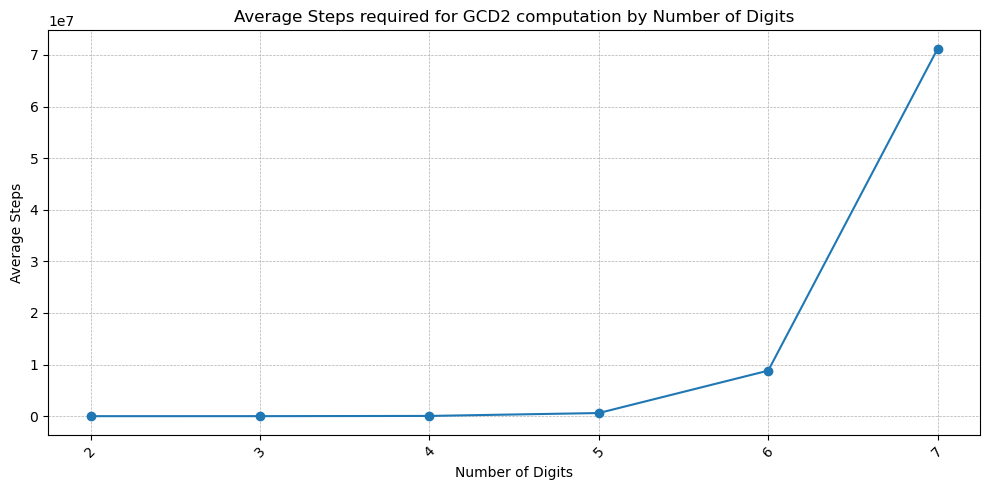

In [7]:
import matplotlib.pyplot as plt

# Sample test data in pairs only
test_cases = [
    (30, 15),
    (20, 72),
    (72, 88),
    (58, 77),
    (92, 80),
    (286, 544),
    (985, 716),
    (839, 433),
    (471, 561),
    (269, 749),
    (1888, 1224),
    (3164, 6996),
    (6253, 5431),
    (4390, 2874),
    (5017, 7615),
    (76241, 57606),
    (74766, 64553),
    (12322, 50440),
    (34726, 92155),
    (14785, 19817),
    (672270, 431511),
    (694404, 256785),
    (975922, 532283),
    (279392, 946230),
    (906443, 392685),
    (2226412, 8648878),
    (6061228, 5546440),
    (1691980, 1414558),
    (3234496, 7268362),
    (8356954, 3705742),
]


# List to store steps for each test case
steps_for_test_cases = []

# Calculating steps for each test case using FindGCD1
for case in test_cases:
    _, steps = FindGCD2(*case)
    steps_for_test_cases.append(steps)

def plot_averaged_data(test_cases, steps_for_test_cases):
    # Group by 5
    grouped_test_cases = [test_cases[i:i+5] for i in range(0, len(test_cases), 5)]
    grouped_steps = [steps_for_test_cases[i:i+5] for i in range(0, len(steps_for_test_cases), 5)]

    # Averaging steps for each group
    average_steps = [sum(group) / len(group) for group in grouped_steps]

    # Number of digits for x-axis label
    x_labels = [len(str(group[0][0])) for group in grouped_test_cases]

    plt.figure(figsize=(10, 5))
    plt.plot(x_labels, average_steps, marker='o', linestyle='-')
    plt.xlabel('Number of Digits')
    plt.ylabel('Average Steps')
    plt.title('Average Steps required for GCD2 computation by Number of Digits')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Call the function
plot_averaged_data(test_cases, steps_for_test_cases)


----

FindGCD3(m,n)

if m > n, then GCD(m, n) = GCD(m %n, n) = GCD(m, m %n)

if m = n, then GCD(m, n) = m = n

if m< n, thenGCD(m, n) = GCD(m, n %m) = GCD(n %m, n)


In [8]:
def FindGCD3(*args):
    """
    Compute the greatest common divisor of m and n using Euclid's algorithm

    Args:
    ----
      args: list of numbers

    Returns:
    -------
      the greatest common divisor of m and n
      
    Raises:
    -------
        ValueError: if the number of arguments is less than 2
        
    Time Complexity:
    ---------------
        O(n*log(m)) where n is the number of arguments and M is the maximum number in the list of arguments.\n
        In the worst case, Euclid's algorithm will take most steps when the two numbers are consecutive Fibonacci numbers.
    """

    if len(args) < 2:
        raise ValueError("Need at least two arguments")
    
    # Initialize step count
    steps = 0
    # Pairwise GCD helper function
    def pairwise_gcd(m, n):
        nonlocal steps
        m, n = abs(m), abs(n)
        steps += 2
        if n == 0:
            steps += 1
            return m
        if m == 0:
            steps += 1
            return n
        if m == n:
            steps += 1
            return m
        if m > n:
            steps += 1
            return pairwise_gcd(m % n, n)
        else:
            steps += 1
            return pairwise_gcd(m, n % m)

    # Compute the GCD of the numbers using a pairwise approach
    gcd_val = pairwise_gcd(args[0], args[1])
    steps += 1
    for num in args[2:]:
        gcd_val = pairwise_gcd(gcd_val, num)
        steps += 2

    return gcd_val, steps


# GCD3 test

In [9]:
import math
# Test cases
test_cases = [
    #Case1
    (111, 234),
    (60, 225),
    (42, 584010),
    (11, 13),
    (7854, 4746),
    (89406024,277984),
    (742271756, 606228865),
    #Extra case1
    (36, 84, 120),
    (189, 252, 1197, 292005),
    #Plot case1
    (30, 15),
    (20, 72),
    (72, 88),
    (58, 77),
    (92, 80),
    (286, 544),
    (985, 716),
    (839, 433),
    (471, 561),
    (269, 749),
    (1888, 1224),
    (3164, 6996),
    (6253, 5431),
    (4390, 2874),
    (5017, 7615),
    (76241, 57606),
    (74766, 64553),
    (12322, 50440),
    (34726, 92155),
    (14785, 19817),
    (672270, 431511),
    (694404, 256785),
    (975922, 532283),
    (279392, 946230),
    (906443, 392685),
    (2226412, 8648878),
    (6061228, 5546440),
    (1691980, 1414558),
    (3234496, 7268362),
    (8356954, 3705742),
    (81786288, 61052652),
    (21535993, 91675657),
    (26586591, 78851391),
    (68575643, 45017255),
    (45991767, 77583796),
    (459917672, 775837965),
    (265865917, 788513914),
    (685756433, 450172557),
    (785756437, 102475659),
    (504857673, 354879547),
    (4737418245, 9465215337),
    (7384184877, 6565315335),
    (6531741823, 8795491761),
    (5865583711, 9535851393),
    (6954464645, 8017257569),
    (84184418245, 65310172575),
    (58659151391, 85756451391),
    (57564301725, 74851857673),
    (59917672487, 88512663377),
    (65315344641, 98418485851),
    (789176724879, 659151396733),
    (659117416437, 946585181391),
    (653184188245, 758331017965),
    (841818235337, 767318488245),
    (953525754641, 658518571823),
    #other case
    (0, 234),       # One element as zero
    (111, 0),       # Other element as zero
    (0, 0),         # Both elements as zero
    (0, 0, 0),        # All elements as zero
    (1, 234),       # One element as one
    (7854, 1),      # Other element as one
    (1, 1),          # Both elements as one
    (15485863,30971726),
    (111,234),
    (60,225),
]

# Variables to track test results
total_tests = len(test_cases)
failed_tests = []

# Run the test cases and compare with math.gcd
for test in test_cases:
    result,steps = FindGCD3(*test)
    expected = math.gcd(*test)
    if result != expected:
        failed_tests.append((test, result, expected))

# Report results
if not failed_tests:
    print("ALL tests passed! ✅")
else:
    print(f"{total_tests - len(failed_tests)} out of {total_tests} tests passed.")
    print("Failed tests:")
    for test, res, exp in failed_tests:
        print(f"For {test}, got: {res} (Expected: {exp})")


ALL tests passed! ✅


# GCD3 graph

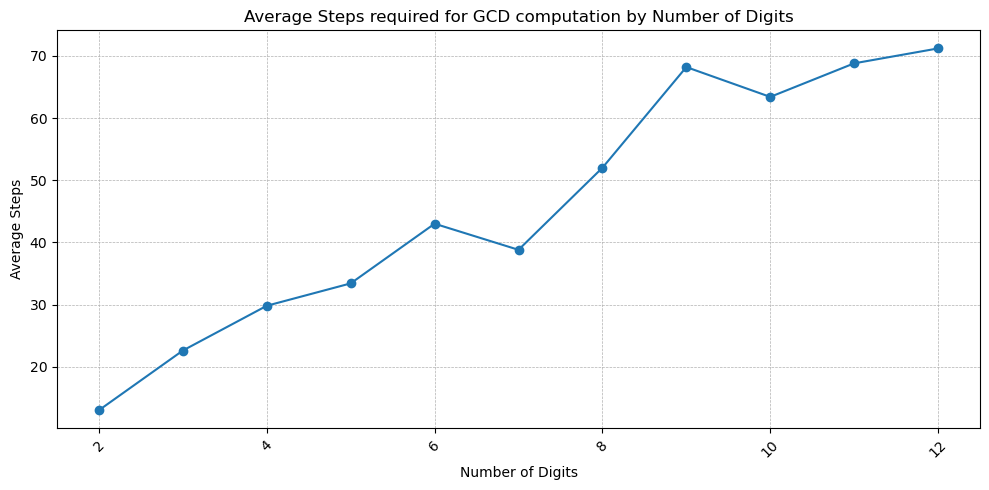

In [10]:
import matplotlib.pyplot as plt

# Sample test data in pairs only
test_cases = [
    (30, 15),
    (20, 72),
    (72, 88),
    (58, 77),
    (92, 80),
    (286, 544),
    (985, 716),
    (839, 433),
    (471, 561),
    (269, 749),
    (1888, 1224),
    (3164, 6996),
    (6253, 5431),
    (4390, 2874),
    (5017, 7615),
    (76241, 57606),
    (74766, 64553),
    (12322, 50440),
    (34726, 92155),
    (14785, 19817),
    (672270, 431511),
    (694404, 256785),
    (975922, 532283),
    (279392, 946230),
    (906443, 392685),
    (2226412, 8648878),
    (6061228, 5546440),
    (1691980, 1414558),
    (3234496, 7268362),
    (8356954, 3705742),
    (81786288, 61052652),
    (21535993, 91675657),
    (26586591, 78851391),
    (68575643, 45017255),
    (45991767, 77583796),
    (459917672, 775837965),
    (265865917, 788513914),
    (685756433, 450172557),
    (785756437, 102475659),
    (504857673, 354879547),
    (4737418245, 9465215337),
    (7384184877, 6565315335),
    (6531741823, 8795491761),
    (5865583711, 9535851393),
    (6954464645, 8017257569),
    (84184418245, 65310172575),
    (58659151391, 85756451391),
    (57564301725, 74851857673),
    (59917672487, 88512663377),
    (65315344641, 98418485851),
    (789176724879, 659151396733),
    (659117416437, 946585181391),
    (653184188245, 758331017965),
    (841818235337, 767318488245),
    (953525754641, 658518571823),
]


# Here I assume you've already executed `FindGCD1` on all the test cases to obtain steps.
# Let's mock that data:
# List to store steps for each test case
steps_for_test_cases = []

# Calculating steps for each test case using FindGCD1
for case in test_cases:
    _, steps = FindGCD3(*case)
    steps_for_test_cases.append(steps)

def plot_averaged_data(test_cases, steps_for_test_cases):
    # Group by 5
    grouped_test_cases = [test_cases[i:i+5] for i in range(0, len(test_cases), 5)]
    grouped_steps = [steps_for_test_cases[i:i+5] for i in range(0, len(steps_for_test_cases), 5)]

    # Averaging steps for each group
    average_steps = [sum(group) / len(group) for group in grouped_steps]

    # Number of digits for x-axis label
    x_labels = [len(str(group[0][0])) for group in grouped_test_cases]

    plt.figure(figsize=(10, 5))
    plt.plot(x_labels, average_steps, marker='o', linestyle='-')
    plt.xlabel('Number of Digits')
    plt.ylabel('Average Steps')
    plt.title('Average Steps required for GCD computation by Number of Digits')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Call the function
plot_averaged_data(test_cases, steps_for_test_cases)


----

In [11]:
test_cases = [
    (30, 15),
    (20, 72),
    (72, 88),
    (58, 77),
    (92, 80),
    (286, 544),
    (985, 716),
    (839, 433),
    (471, 561),
    (269, 749),
    (1888, 1224),
    (3164, 6996),
    (6253, 5431),
    (4390, 2874),
    (5017, 7615),
    (76241, 57606),
    (74766, 64553),
    (12322, 50440),
    (34726, 92155),
    (14785, 19817),
    (672270, 431511),
    (694404, 256785),
    (975922, 532283),
    (279392, 946230),
    (906443, 392685),
    (2226412, 8648878),
    (6061228, 5546440),
    (1691980, 1414558),
    (3234496, 7268362),
    (8356954, 3705742),
    (81786288, 61052652),
    (21535993, 91675657),
    (26586591, 78851391),
    (68575643, 45017255),
    (45991767, 77583796),
    (459917672, 775837965),
    (265865917, 788513914),
    (685756433, 450172557),
    (785756437, 102475659),
    (504857673, 354879547),
    (4737418245, 9465215337),
    (7384184877, 6565315335),
    (6531741823, 8795491761),
    (5865583711, 9535851393),
    (6954464645, 8017257569),
    (84184418245, 65310172575),
    (58659151391, 85756451391),
    (57564301725, 74851857673),
    (59917672487, 88512663377),
    (65315344641, 98418485851),
    (789176724879, 659151396733),
    (659117416437, 946585181391),
    (653184188245, 758331017965),
    (841818235337, 767318488245),
    (953525754641, 658518571823),
]

# GRAPH

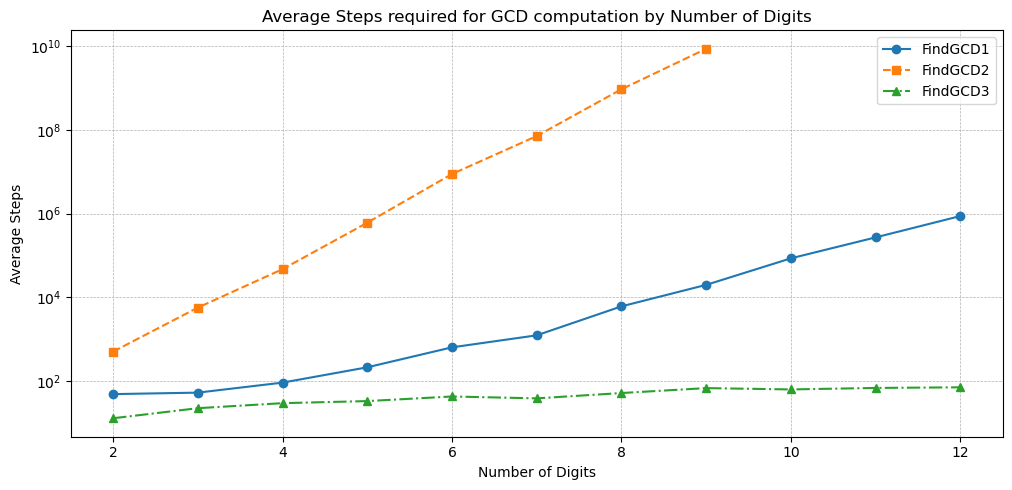

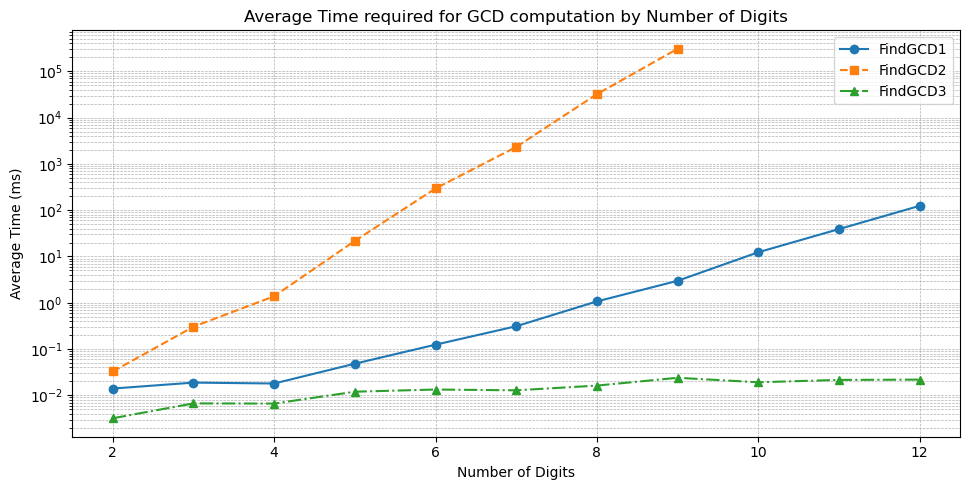

In [12]:
import matplotlib.pyplot as plt
import time

# List to store steps for each test case for each function
steps_for_test_cases1 = []
steps_for_test_cases2 = []
steps_for_test_cases3 = []

# List to store time for each test case for each function
times_for_test_cases1 = []
times_for_test_cases2 = []
times_for_test_cases3 = []

# Calculating steps for each test case using the three functions
for case in test_cases:
    if 2<= len(str(case[0])) <= 9:
        start_time = time.perf_counter()
        _, steps2 = FindGCD2(*case)
        times_for_test_cases2.append((time.perf_counter() - start_time)*1000)
        steps_for_test_cases2.append(steps2)
    else:
        times_for_test_cases2.append(None)
        steps_for_test_cases2.append(None)
        
    start_time = time.perf_counter()
    _, steps1 = FindGCD1(*case)
    times_for_test_cases1.append((time.perf_counter() - start_time)*1000)
    
    start_time = time.perf_counter()
    _, steps3 = FindGCD3(*case)
    times_for_test_cases3.append((time.perf_counter() - start_time)*1000)
    
    steps_for_test_cases1.append(steps1)
    steps_for_test_cases3.append(steps3)

    
def plot_averaged_step(test_cases, steps_data1, steps_data2, steps_data3):
    # Number of digits for x-axis label
    x_labels = [len(str(test_cases[i][0])) for i in range(0, len(test_cases), 5)]

    avg_steps1 = average_datas(steps_data1)
    avg_steps2 = average_datas(steps_data2)
    avg_steps3 = average_datas(steps_data3)

    plt.figure(figsize=(10, 5))

    plt.plot(x_labels, avg_steps1, marker='o', linestyle='-', label='FindGCD1')
    plt.plot(x_labels, avg_steps2, marker='s', linestyle='--', label='FindGCD2')
    plt.plot(x_labels, avg_steps3, marker='^', linestyle='-.', label='FindGCD3')

    plt.xlabel('Number of Digits')
    plt.ylabel('Average Steps')
    plt.title('Average Steps required for GCD computation by Number of Digits')
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.yscale('log')
    plt.legend()
    plt.show()

def plot_averaged_time(test_cases, times_data1, times_data2, times_data3):
    # Number of digits for x-axis label
    x_labels = [len(str(test_cases[i][0])) for i in range(0, len(test_cases), 5)]

    avg_times1 = average_datas(times_data1)
    avg_times2 = average_datas(times_data2)
    avg_times3 = average_datas(times_data3)

    plt.figure(figsize=(10, 5))

    plt.plot(x_labels, avg_times1, marker='o', linestyle='-', label='FindGCD1')
    plt.plot(x_labels, avg_times2, marker='s', linestyle='--', label='FindGCD2')
    plt.plot(x_labels, avg_times3, marker='^', linestyle='-.', label='FindGCD3')

    plt.xlabel('Number of Digits')
    plt.ylabel('Average Time (ms)')
    plt.title('Average Time required for GCD computation by Number of Digits')
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.yscale('log')
    plt.legend()
    plt.show()

def average_datas(data_list):
    """
    Group by 5 and compute the average for each group.
    Args:
    - data_list (list of float): List of data.

    Returns:
    - list of float: Averaged data.
    """
    grouped_data = [data_list[i:i+5] for i in range(0, len(data_list), 5)]
    return [sum(filter(None, group)) / len(list(filter(None, group))) if len(list(filter(None, group))) > 0 else None for group in grouped_data]

# Call the function
plot_averaged_step(test_cases, steps_for_test_cases1, steps_for_test_cases2, steps_for_test_cases3)
plot_averaged_time(test_cases, times_for_test_cases1, times_for_test_cases2, times_for_test_cases3)

----